In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Constants
me = 0.511       # Electron mass (MeV/c^2)
mmu = 105.66     # Muon mass (MeV/c^2)
K = 0.307075     # MeV mol^-1 cm^2
Z = 6.5          # Effective Z for plastic (polystyrene C8H8)
A = 13.0         # Effective A for plastic
I = 64.7e-6      # Mean excitation potential in MeV
rho = 1.03       # Density of plastic in g/cm^3

# Momentum range in MeV/c
p = np.logspace(-1, 2, 300) * 1e3  # 0.1 to 100 GeV/c

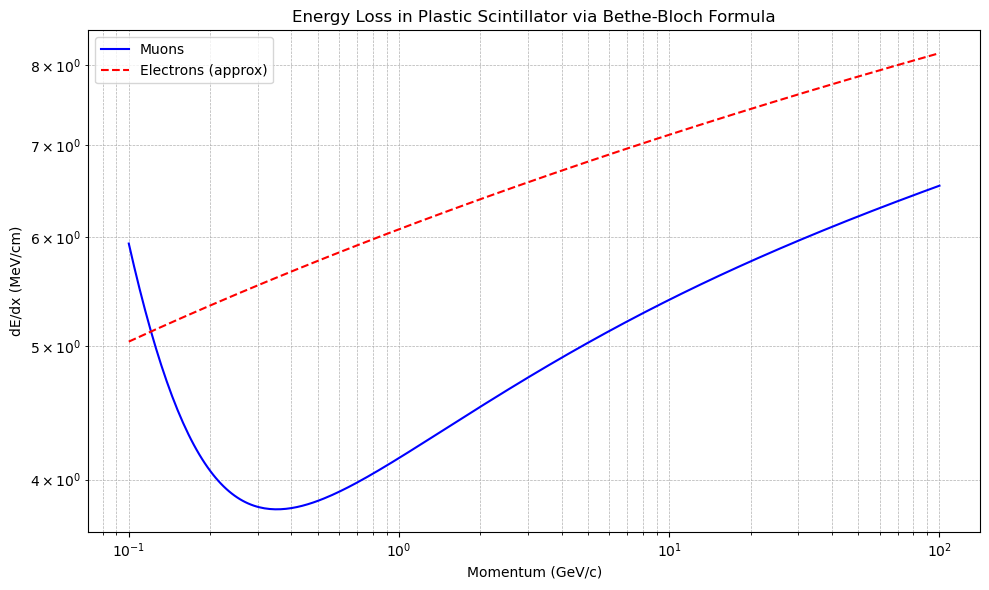

In [4]:

# Constants
me = 0.511       # Electron mass (MeV/c^2)
mmu = 105.66     # Muon mass (MeV/c^2)
K = 0.307075     # MeV mol^-1 cm^2
Z = 5.7         # Effective Z for PVT
A = 12.0         # Effective A for PVT
I = 64.7e-6      # Mean excitation potential in MeV
rho = 1.032       # Density of plastic in g/cm^3

# Momentum range in MeV/c
p = np.logspace(-1, 2, 300) * 1e3  # 0.1 to 100 GeV/c

def bethe_bloch(p, m):
    """Compute dE/dx using the Bethe-Bloch formula for a particle of mass m."""
    E = np.sqrt(p**2 + m**2)
    beta = p / E
    gamma = E / m
    me_over_m = me / m
    Wmax = (2 * me * beta**2 * gamma**2) / (1 + 2 * gamma * me_over_m + me_over_m**2)
    argument = 2 * me * beta**2 * gamma**2 * Wmax / I**2
    valid = argument > 0
    log_term = np.zeros_like(argument)
    log_term[valid] = np.log(argument[valid])
    dEdx = K * Z / A * (1 / beta**2) * (log_term - beta**2)
    return dEdx * rho

# Compute dE/dx for muons and electrons
dEdx_muon = bethe_bloch(p, mmu)
dEdx_electron = bethe_bloch(p, me)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(p / 1e3, dEdx_muon, label='Muons', color='blue')
plt.plot(p / 1e3, dEdx_electron, label='Electrons (approx)', color='red', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel(r'dE/dx (MeV/cm)')
plt.title('Energy Loss in Plastic Scintillator via Bethe-Bloch Formula')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
p0 = 105
bethe_bloch(p0, mmu), bethe_bloch(p0, me)


(5.695402623007727, 5.059833533822747)